# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Naive Bayes

In [2]:
def naive_bayes(x_train, y_train):
    
    # Convert input data to NumPy arrays
    x_train, y_train = np.array(x_train),np.array(y_train)
    
    new_classes, no_of_classes = np.unique(y_train, return_counts=True)
    class_probability = no_of_classes / len(y_train)
    
    # Calculate mean and standard deviation for each class and feature
    mean = {}
    st_dev = {}
    for fnt in new_classes:
        fnt_data = x_train[y_train==fnt]
        mean[fnt] = np.mean(fnt_data, axis=0)
        st_dev[fnt] = np.std(fnt_data, axis=0)
        
    # Predict class labels for test data
    y_test = []
    for x in x_train:
        probability = []
        for fnt in new_classes:
            mean1 = mean[fnt]
            std = st_dev[fnt]
            
            # Computing Gaussian-Distribution-Probability
            prob = np.prod(1 / (np.sqrt(2 * np.pi) * std) * np.exp(-(x - mean1) ** 2 / (2 * std ** 2)))
            probability.append(prob)
        
        # Assign the maximum probability class
        y_test.append(new_classes[np.argmax(probability)])
    
    return np.array(y_test)


# loading Dataset & Removing Null Values

In [3]:
# Load the dataset

df = pd.read_csv('train.csv')

In [4]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df=df.drop("Cabin", axis='columns')

In [6]:
df=df.dropna()

In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [8]:
#df.Fare[df['Fare']==0]


In [9]:
#df['Fare'].replace(to_replace = 0, value = pd.NA, inplace=True)

# Main Function

In [10]:
# Split the dataset into train and test datasets
x_train = df.drop(['Survived','Name','Sex','Ticket','Embarked','Parch','SibSp'], axis=1).values
y_train = df['Fare'].values

# Apply Naive-Bayes algorithm
y_test = naive_bayes(x_train, y_train)

# Calculate accuracy
accuracy = np.mean(y_test == y_train)
print("Accuracy:", accuracy)


C:\Users\ujjwa\AppData\Local\Temp\ipykernel_30016\2654033215.py:26: RuntimeWarning: divide by zero encountered in true_divide
  prob = np.prod(1 / (np.sqrt(2 * np.pi) * std) * np.exp(-(x - mean1) ** 2 / (2 * std ** 2)))
C:\Users\ujjwa\AppData\Local\Temp\ipykernel_30016\2654033215.py:26: RuntimeWarning: invalid value encountered in multiply
  prob = np.prod(1 / (np.sqrt(2 * np.pi) * std) * np.exp(-(x - mean1) ** 2 / (2 * std ** 2)))
C:\Users\ujjwa\AppData\Local\Temp\ipykernel_30016\2654033215.py:26: RuntimeWarning: invalid value encountered in true_divide
  prob = np.prod(1 / (np.sqrt(2 * np.pi) * std) * np.exp(-(x - mean1) ** 2 / (2 * std ** 2)))


Accuracy: 0.009831460674157303


# visualaizing the data

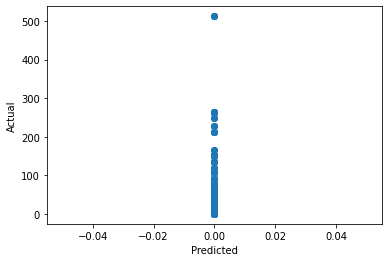

In [11]:
xtrain=x_train
ytrain=y_train

plt.scatter(y_test,y_train)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()